In [117]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

In [118]:
DATA_PATH = Path.cwd().parent / "sahit" / "Downloads" / "dataset and all"    

In [119]:
features = pd.read_csv(
    DATA_PATH / "training_set_features.csv",
    index_col="respondent_id"
)
labels = pd.read_csv(
    DATA_PATH / "training_set_labels.csv",
    index_col="respondent_id"
)

In [120]:
print("features.shape", features.shape)
features.head()

features.shape (26707, 35)


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [121]:
print("labels.shape", labels.shape)
labels.head()

labels.shape (26707, 2)


,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [122]:
features.dtypes != 'object'

xyz_concern                     True
xyz_knowledge                   True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_xyz                 True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_xyz_vacc_effective      True
opinion_xyz_risk                True
opinion_xyz_sick_from_vacc      True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [123]:
numeric_cols = features.columns[features.dtypes != 'object'].values
print(numeric_cols)

['xyz_concern' 'xyz_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_xyz' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_xyz_vacc_effective' 'opinion_xyz_risk'
 'opinion_xyz_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [124]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [125]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols)
    ],
    remainder='drop'
)

In [126]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty='l2', C=1)
)

In [127]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators)
])

In [128]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  array(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_hom...
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=6)

In [130]:
full_pipeline.fit(X_train, y_train)
predictions=full_pipeline.predict_proba(X_test)

In [131]:
predictions

[array([[0.93559335, 0.06440665],
        [0.81929527, 0.18070473],
        [0.96454266, 0.03545734],
        ...,
        [0.90874789, 0.09125211],
        [0.94080449, 0.05919551],
        [0.92180079, 0.07819921]]),
 array([[0.10616493, 0.89383507],
        [0.60530674, 0.39469326],
        [0.49163725, 0.50836275],
        ...,
        [0.40947901, 0.59052099],
        [0.28427838, 0.71572162],
        [0.51339734, 0.48660266]])]

In [132]:
y_preds = pd.DataFrame({"xyz_vaccine": predictions[0][:, 1], "seasonal_vaccine": predictions[1][:, 1],}, index=y_test.index)

In [133]:
print("y_preds.shape", y_preds.shape)
y_preds.head()

y_preds.shape (8814, 2)


,xyz_vaccine,seasonal_vaccine
respondent_id,,
2611,0.064407,0.893835
18313,0.180705,0.394693
26211,0.035457,0.508363
843,0.116006,0.342397
6951,0.035335,0.040630


In [134]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

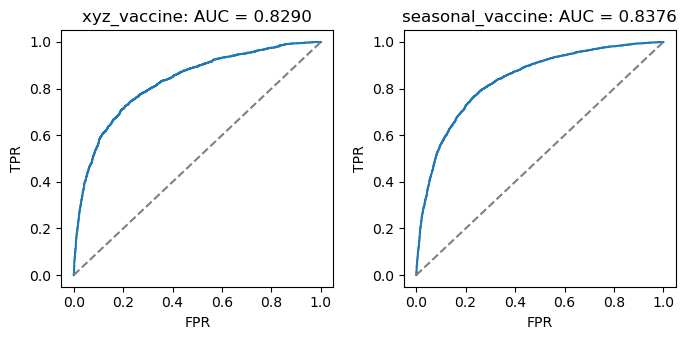

In [135]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['xyz_vaccine'],
    y_preds['xyz_vaccine'],
    'xyz_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [136]:
roc_auc_score(y_test, y_preds)

0.833280081216905

In [137]:
test_features_df = pd.read_csv(DATA_PATH / "test_set_features.csv", 
                               index_col="respondent_id")
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.87624796, 0.12375204],
        [0.94808339, 0.05191661],
        [0.65645734, 0.34354266],
        ...,
        [0.81305144, 0.18694856],
        [0.94930835, 0.05069165],
        [0.4060507 , 0.5939493 ]]),
 array([[0.58460758, 0.41539242],
        [0.92447066, 0.07552934],
        [0.39647816, 0.60352184],
        ...,
        [0.61043947, 0.38956053],
        [0.66817627, 0.33182373],
        [0.36195637, 0.63804363]])]

In [138]:
submission_df = pd.read_csv('submission_format.csv')
submission_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.123752,0.415392
1,26708,0.051917,0.075529
2,26709,0.343543,0.603522
3,26710,0.456373,0.800216
4,26711,0.280506,0.657428


In [139]:
submission_df["xyz_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.123752,0.415392
1,26708,0.051917,0.075529
2,26709,0.343543,0.603522
3,26710,0.456373,0.800216
4,26711,0.280506,0.657428


In [140]:
submission_df.to_csv('submission_format.csv', index=False)

print("Predictions saved to submission_format.csv")

Predictions saved to submission_format.csv
